Mon: 06/12/2021

In [44]:
## import required lib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
Tit_train = pd.read_csv('../data/train.csv', index_col = 0)
Tit_train.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Tit_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
Tit_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
Sur_Y = Tit_train.loc[Tit_train['Survived'] == 1]['Survived'].value_counts()
Sur_N = Tit_train.loc[Tit_train['Survived'] == 0]['Survived'].value_counts()
print (Sur_Y, Sur_N)

1    342
Name: Survived, dtype: int64 0    549
Name: Survived, dtype: int64


<AxesSubplot:>

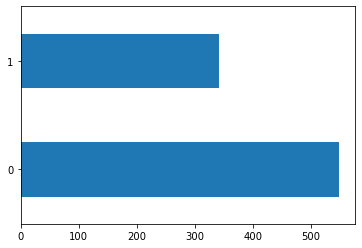

In [6]:
Tit_train.Survived.value_counts().plot.barh()

In [7]:
###Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

Sur_Y = Tit_train.loc[Tit_train['Survived'] == 1]['Survived'].value_counts()
First_clas = Tit_train.loc[Tit_train['Pclass'] == 1]['Pclass'].value_counts()
Prop_sur = Sur_Y/First_clas

Prop_sur


1    1.583333
dtype: float64

In [8]:
Tit_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Gender')

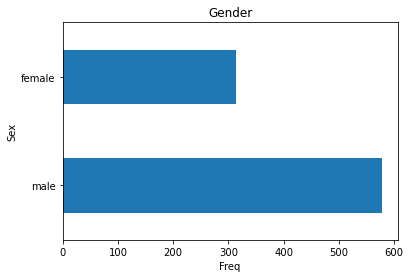

In [9]:
###Step 4 Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.
Tit_train.Sex.value_counts().plot.barh()
plt.xlabel("Freq")
plt.ylabel("Sex")
plt.title("Gender")



Text(0.5, 1.0, 'Class')

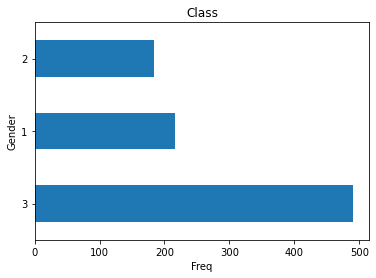

In [10]:
Tit_train.Pclass.value_counts().plot.barh()
plt.xlabel("Freq")
plt.ylabel("Gender")
plt.title("Class")

Text(0.5, 1.0, 'Age dis')

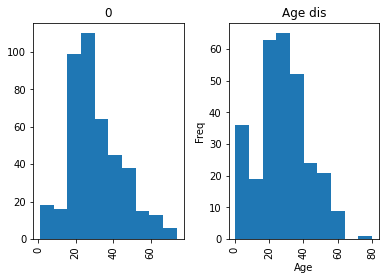

In [11]:
Tit_train.hist(column='Age', by='Survived' )
plt.xlabel("Age")
plt.ylabel("Freq")
plt.title("Age dis")


In [12]:
Tit_train.groupby(Tit_train['Survived']==1)['Age'].mean()

Survived
False    30.626179
True     28.343690
Name: Age, dtype: float64

In [13]:
Tit_train.Age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
####replace missing value

Tit_train['Age'] = Tit_train['Age'].fillna(Tit_train['Age'].mean())

In [15]:
Tit_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
####Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.
Data_i = Tit_train.groupby(['Pclass', 'Sex'])['Survived'].value_counts()
Data_i=pd.DataFrame(Data_i)

In [17]:
Data_i

Survived
Pclass Sex    Survived          
1      female 1               91
              0                3
       male   0               77
              1               45
2      female 1               70
              0                6
       male   0               91
              1               17
3      female 0               72
              1               72
       male   0              300
              1               47

07/12/2021: Running Logistic Regression 

In [33]:
###seperate data into X and y
X = Tit_train[['Pclass']]
y = Tit_train['Survived']

In [34]:
###split existing data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size= 0.4)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((534, 1), (357, 1), (534,), (357,))

In [35]:
X_train.shape, y_train.shape

((534, 1), (534,))

In [36]:
###check propotion of each class in y_train
y_train.value_counts()

0    315
1    219
Name: Survived, dtype: int64

In [60]:
#Train model
m = LogisticRegression(class_weight ='balanced')   ###call the model to use

In [61]:
###fit model with training data
m.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [62]:
###print the coefficients
m.coef_, m.intercept_

(array([[-0.7955766]]), array([1.81432851]))

In [63]:
###test for accuracy
m.score(X_train, y_train)

0.6554307116104869

In [64]:
m.score(X_test, y_test) 

0.6862745098039216

In [65]:
###compute accuracy using the accuracy score method
y_pred =m.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6862745098039216

####the accuracy is low, so new features needs to be added to X

In [67]:
probs = m.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])

In [68]:
mythreshold = 0.9
pred_0_9 = (probs[:,1] >= mythreshold).astype(int)
pred_0_9


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [69]:
mythreshold_2 = 0.1
pred_0_1 = (probs[:,1] >= mythreshold_2).astype(int)
pred_0_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Area under the curve =  0.7036689597665207


(0.0, 1.0)

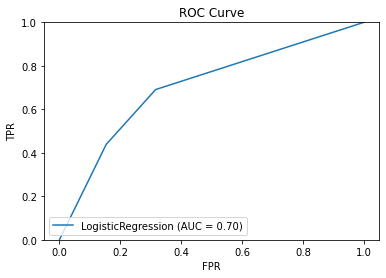

In [71]:
#### Calculating area under the curve
auc_score = metrics.auc(fpr, tpr)
print("Area under the curve = ",auc_score)

metrics.plot_roc_curve(m, X_test, y_test) ####plot_roc_curve is a fuvtion f
                ####using the model and test data
plt.title("ROC Curve")

plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend(loc="lower left")
plt.ylim([0,1.00])